In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
aero = pd.read_csv("df_all_time_formatted.csv")

In [3]:
print(aero.columns)

Index(['Unnamed: 0', 'FL_DATE', 'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_AIRLINE_ID',
       'MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'SCH_OP_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'DUP', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_A

In [4]:
aero_dropped = aero.drop(["MKT_UNIQUE_CARRIER","MKT_CARRIER_AIRLINE_ID","TAIL_NUM","FL_DATE","DEP_TIME"
                          ,"ARR_TIME","CRS_DEP_TIME","DEP_DELAY","ARR_DELAY","CRS_ARR_TIME","WHEELS_OFF","WHEELS_OFF","WHEELS_ON","MKT_CARRIER","MKT_CARRIER_FL_NUM","SCH_OP_CARRIER_FL_NUM",
                          "SCH_OP_CARRIER_FL_NUM","ORIGIN_AIRPORT_ID","ORIGIN_AIRPORT_SEQ_ID","ORIGIN_CITY_MARKET_ID","DEP_TIME_formatted"
                          ,"ARR_TIME_formatted","WHEELS_OFF_formatted","WHEELS_ON_formatted"
                          ,"ORIGIN_CITY_NAME","ORIGIN_STATE_ABR","DEST_AIRPORT_ID","DEST_AIRPORT_SEQ_ID","DEST_CITY_MARKET_ID","CRS_DEP_TIME_formatted","CRS_ARR_TIME_formatted","FL_DATE_formatted"
                          ,"DEST_CITY_NAME","DEST_STATE_ABR","FIRST_DEP_TIME","TOTAL_ADD_GTIME","LONGEST_ADD_GTIME"], axis='columns')

In [5]:
print(aero_dropped.columns)

Index(['Unnamed: 0', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'DEST', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',
       'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'DUP',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DEP_DATE_TIME',
       'ARR_DATE_TIME', 'CRS_DEP_DATE_TIME', 'CRS_ARR_DATE_TIME',
       'WHEELS_OFF_DATE_TIME', 'WHEELS_ON_DATE_TIME'],
      dtype='object')


In [6]:
print(aero_dropped.head())

   Unnamed: 0 OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  DEP_DELAY_NEW  \
0           0                AA                  1    JFK  LAX            0.0   
1           1                AA                 10    LAX  JFK           40.0   
2           3                AA               1032    JFK  MIA            0.0   
3           5                AA               1092    AUS  JFK           10.0   
4           6                AA               1093    LGA  RDU            0.0   

   DEP_DEL15  DEP_DELAY_GROUP DEP_TIME_BLK  TAXI_OUT  TAXI_IN  ARR_DELAY_NEW  \
0        0.0             -1.0    0700-0759      17.0     12.0            2.0   
1        1.0              2.0    2200-2259      19.0      5.0           17.0   
2        0.0             -1.0    0600-0659      23.0     30.0           11.0   
3        0.0              0.0    1300-1359      13.0     17.0            6.0   
4        0.0             -1.0    1600-1659      16.0     23.0            0.0   

   ARR_DEL15  ARR_DELAY_GROUP AR

# Cleaning the DEP_DATE_TIME data

In [7]:
#aero_dropped['DEP_DATE_TIME'] = aero_dropped['DEP_DATE_TIME'].apply(lambda a: a if len(str(a)) > 14 else '')

In [8]:
#aero_dropped["DEP_DATE_TIME"] = np.where(aero_dropped['DEP_DATE_TIME'].str.contains('24:00'), pd.to_datetime(aero_dropped['DEP_DATE_TIME'].str.replace('24:00', '00:00')) + pd.Timedelta(days=1), aero_dropped['DEP_DATE_TIME'])

In [9]:
goodcolumns = pd.read_csv("dvasl.csv")
aero_dropped[['DEP_DATE_TIME', 'ARR_DATE_TIME']] = goodcolumns[['DEP_DATE_TIME', 'ARR_DATE_TIME']]

In [10]:
aero_dropped['DEP_DATE_TIME'] = pd.to_datetime(aero_dropped['DEP_DATE_TIME'])
aero_dropped['DEP_DATE_TIME_H'] = aero_dropped['DEP_DATE_TIME'].dt.floor('H')

In [11]:
print(aero_dropped.head())

   Unnamed: 0 OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  DEP_DELAY_NEW  \
0           0                AA                  1    JFK  LAX            0.0   
1           1                AA                 10    LAX  JFK           40.0   
2           3                AA               1032    JFK  MIA            0.0   
3           5                AA               1092    AUS  JFK           10.0   
4           6                AA               1093    LGA  RDU            0.0   

   DEP_DEL15  DEP_DELAY_GROUP DEP_TIME_BLK  TAXI_OUT  TAXI_IN  ARR_DELAY_NEW  \
0        0.0             -1.0    0700-0759      17.0     12.0            2.0   
1        1.0              2.0    2200-2259      19.0      5.0           17.0   
2        0.0             -1.0    0600-0659      23.0     30.0           11.0   
3        0.0              0.0    1300-1359      13.0     17.0            6.0   
4        0.0             -1.0    1600-1659      16.0     23.0            0.0   

   ARR_DEL15  ARR_DELAY_GROUP AR

# Cleaning METEO data

In [12]:
meteo = pd.read_csv("meteo_n.csv", delimiter=';')

In [13]:
print(meteo.columns)

Index(['station', 'valid_date', 'valid_time_new', 'valid_date_time', 'tmpf',
       'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust',
       'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct',
       'peak_wind_time', 'feel', 'metar', 'airport', 'snowdepth'],
      dtype='object')


In [14]:
print(meteo.head())

  station  valid_date valid_time_new   valid_date_time  tmpf  dwpf    relh  \
0     LGA  01.01.2023           0:15  01.01.2023 00:15  46.0  45.0   96.28   
1     JFK  01.01.2023           0:51  01.01.2023 00:51  48.0  48.0  100.00   
2     LGA  01.01.2023           0:51  01.01.2023 00:51  46.0  45.0   96.28   
3     JFK  01.01.2023           1:51  01.01.2023 01:51  49.0  49.0  100.00   
4     LGA  01.01.2023           1:51  01.01.2023 01:51  47.0  45.0   93.06   

    drct  sknt  p01i   alti    mslp  vsby  gust skyc1 skyc2 skyc3 skyc4  \
0    0.0   0.0  0.01  29.83     NaN  0.50   NaN   VV    NaN   NaN   NaN   
1  200.0   4.0  0.04  29.83  1010.2  0.25   NaN   BKN   OVC   NaN   NaN   
2   70.0   3.0  0.03  29.82  1009.8  0.50   NaN   VV    NaN   NaN   NaN   
3  190.0   5.0  0.03  29.80  1009.2  0.25   NaN   VV    NaN   NaN   NaN   
4    0.0   0.0  0.04  29.79  1008.6  0.50   NaN   VV    NaN   NaN   NaN   

   skyl1  skyl2  skyl3  skyl4 wxcodes  ice_accretion_1hr  ice_accretion_3hr  \
0

In [15]:
meteo_dropped = meteo.drop(["valid_date", "valid_time_new", "metar", "airport", "ice_accretion_1hr",
                            "ice_accretion_3hr", "ice_accretion_6hr", "snowdepth",], axis="columns")

In [16]:
print(meteo_dropped.columns)

Index(['station', 'valid_date_time', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt',
       'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3',
       'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel'],
      dtype='object')


In [17]:
meteo_dropped['valid_date_time'] = pd.to_datetime(meteo_dropped['valid_date_time'], format = "%d.%m.%Y %H:%M")
meteo_dropped['valid_date_time_H'] = meteo_dropped['valid_date_time'].dt.floor('H')

In [18]:
print(meteo_dropped.head())

  station     valid_date_time  tmpf  dwpf    relh   drct  sknt  p01i   alti  \
0     LGA 2023-01-01 00:15:00  46.0  45.0   96.28    0.0   0.0  0.01  29.83   
1     JFK 2023-01-01 00:51:00  48.0  48.0  100.00  200.0   4.0  0.04  29.83   
2     LGA 2023-01-01 00:51:00  46.0  45.0   96.28   70.0   3.0  0.03  29.82   
3     JFK 2023-01-01 01:51:00  49.0  49.0  100.00  190.0   5.0  0.03  29.80   
4     LGA 2023-01-01 01:51:00  47.0  45.0   93.06    0.0   0.0  0.04  29.79   

     mslp  vsby  gust skyc1 skyc2 skyc3 skyc4  skyl1  skyl2  skyl3  skyl4  \
0     NaN  0.50   NaN   VV    NaN   NaN   NaN  300.0    NaN    NaN    NaN   
1  1010.2  0.25   NaN   BKN   OVC   NaN   NaN  300.0  800.0    NaN    NaN   
2  1009.8  0.50   NaN   VV    NaN   NaN   NaN  300.0    NaN    NaN    NaN   
3  1009.2  0.25   NaN   VV    NaN   NaN   NaN  300.0    NaN    NaN    NaN   
4  1008.6  0.50   NaN   VV    NaN   NaN   NaN  300.0    NaN    NaN    NaN   

  wxcodes  peak_wind_gust  peak_wind_drct peak_wind_time   fee

# Merging the two dataframes
Zde jsme provedli merge. Kód je rozdělen na dva joiny, protože jsme měli problém v případech kdy bylo potřeba doplnit meteorologické data k letům s destination JFK, nebo LGA. 

In [19]:
# Merge for flights with other destination airports
merged_data_other_dest = pd.merge(aero_dropped[aero_dropped['DEST'].isin(['JFK', 'LGA']) == False], meteo_dropped,
                                  left_on=["DEP_DATE_TIME_H", "ORIGIN"], right_on=["valid_date_time_H", "station"], how="left")

# Merge for flights with JFK or LGA as the destination airport
merged_data_jfk_lga_dest = pd.merge(aero_dropped[aero_dropped['DEST'].isin(['JFK', 'LGA'])], meteo_dropped,
                                    left_on=["DEP_DATE_TIME_H", "DEST"], right_on=["valid_date_time_H", "station"], how="left")

# Concatenate the results
merged_data_final = pd.concat([merged_data_other_dest, merged_data_jfk_lga_dest], ignore_index=True)


## Stanice nemá data v konkrétní hodinu
V datasetu se stále nacházela data, kdy meteorologická stanice neměla data. Těch bylo konkrétně **2504** a rozhodli jsme se je odebrat a resetovat index

In [20]:
null_station_count = merged_data_final['station'].isnull().sum()
print(null_station_count)
merged_data_final = merged_data_final.dropna(subset=['station'])

merged_data_final = merged_data_final.reset_index(drop=True)
merged_data_final.to_csv('final_merged1.csv', index=False)
merged_data_final.info()
merged_data_final.describe()
merged_data_final.head(10)

2504


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54176 entries, 0 to 54175
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            54176 non-null  int64         
 1   OP_UNIQUE_CARRIER     54176 non-null  object        
 2   OP_CARRIER_FL_NUM     54176 non-null  int64         
 3   ORIGIN                54176 non-null  object        
 4   DEST                  54176 non-null  object        
 5   DEP_DELAY_NEW         54176 non-null  float64       
 6   DEP_DEL15             54176 non-null  float64       
 7   DEP_DELAY_GROUP       54176 non-null  float64       
 8   DEP_TIME_BLK          54176 non-null  object        
 9   TAXI_OUT              54111 non-null  float64       
 10  TAXI_IN               54093 non-null  float64       
 11  ARR_DELAY_NEW         53962 non-null  float64       
 12  ARR_DEL15             53962 non-null  float64       
 13  ARR_DELAY_GROUP 

,Unnamed: 0,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,DUP,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DATE_TIME,ARR_DATE_TIME,CRS_DEP_DATE_TIME,CRS_ARR_DATE_TIME,WHEELS_OFF_DATE_TIME,WHEELS_ON_DATE_TIME,DEP_DATE_TIME_H,station,valid_date_time,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,valid_date_time_H
0,0,AA,1,JFK,LAX,0.0,0.0,-1.0,0700-0759,17.0,12.0,2.0,0.0,0.0,1000-1059,0.0,NaN,0.0,N,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:26:00,2023-01-01 10:54:00,2023-01-01 07:30:00,2023-01-01 10:52:00,2023-01-01 07:43:00,2023-01-01 10:42:00,2023-01-01 07:00:00,JFK,2023-01-01 07:15:00,46.0,46.0,100.00,250.0,9.0,0.00,29.76,NaN,0.25,NaN,BKN,OVC,NaN,NaN,500.0,1000.0,NaN,NaN,FG,NaN,NaN,NaN,40.92,2023-01-01 07:00:00
1,0,AA,1,JFK,LAX,0.0,0.0,-1.0,0700-0759,17.0,12.0,2.0,0.0,0.0,1000-1059,0.0,NaN,0.0,N,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:26:00,2023-01-01 10:54:00,2023-01-01 07:30:00,2023-01-01 10:52:00,2023-01-01 07:43:00,2023-01-01 10:42:00,2023-01-01 07:00:00,JFK,2023-01-01 07:25:00,46.0,46.0,100.00,250.0,9.0,0.00,29.77,NaN,0.75,NaN,VV,NaN,NaN,NaN,700.0,NaN,NaN,NaN,BR,NaN,NaN,NaN,40.92,2023-01-01 07:00:00
2,0,AA,1,JFK,LAX,0.0,0.0,-1.0,0700-0759,17.0,12.0,2.0,0.0,0.0,1000-1059,0.0,NaN,0.0,N,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:26:00,2023-01-01 10:54:00,2023-01-01 07:30:00,2023-01-01 10:52:00,2023-01-01 07:43:00,2023-01-01 10:42:00,2023-01-01 07:00:00,JFK,2023-01-01 07:29:00,46.0,46.0,100.00,250.0,8.0,0.00,29.77,NaN,1.00,NaN,VV,NaN,NaN,NaN,800.0,NaN,NaN,NaN,BR,NaN,NaN,NaN,41.36,2023-01-01 07:00:00
3,0,AA,1,JFK,LAX,0.0,0.0,-1.0,0700-0759,17.0,12.0,2.0,0.0,0.0,1000-1059,0.0,NaN,0.0,N,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:26:00,2023-01-01 10:54:00,2023-01-01 07:30:00,2023-01-01 10:52:00,2023-01-01 07:43:00,2023-01-01 10:42:00,2023-01-01 07:00:00,JFK,2023-01-01 07:39:00,47.0,47.0,100.00,260.0,8.0,0.00,29.77,NaN,2.00,NaN,BKN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,BR,NaN,NaN,NaN,42.47,2023-01-01 07:00:00
4,0,AA,1,JFK,LAX,0.0,0.0,-1.0,0700-0759,17.0,12.0,2.0,0.0,0.0,1000-1059,0.0,NaN,0.0,N,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,2023-01-01 07:26:00,2023-01-01 10:54:00,2023-01-01 07:30:00,2023-01-01 10:52:00,2023-01-01 07:43:00,2023-01-01 10:42:00,2023-01-01 07:00:00,JFK,2023-01-01 07:51:00,49.0,49.0,100.00,260.0,11.0,0.00,29.78,1008.3,6.00,NaN,FEW,BKN,BKN,NaN,800.0,8000.0,25000.0,NaN,BR,NaN,NaN,NaN,43.82,2023-01-01 07:00:00
5,3,AA,1032,JFK,MIA,0.0,0.0,-1.0,0600-0659,23.0,30.0,11.0,0.0,0.0,1000-1059,0.0,NaN,0.0,N,201.0,215.0,162.0,1.0,1089.0,5,NaN,NaN,NaN,NaN,NaN,2023-01-01 06:56:00,2023-01-01 10:31:00,2023-01-01 06:59:00,2023-01-01 10:20:00,2023-01-01 07:19:00,2023-01-01 10:01:00,2023-01-01 06:00:00,JFK,2023-01-01 06:51:00,46.0,46.0,100.00,240.0,8.0,0.00,29.75,1007.3,0.25,NaN,VV,NaN,NaN,NaN,200.0,NaN,NaN,NaN,FG,NaN,NaN,NaN,41.36,2023-01-01 06:00:00
6,6,AA,1093,LGA,RDU,0.0,0.0,-1.0,1600-1659,16.0,23.0,0.0,0.0,-2.0,1800-1859,0.0,NaN,0.0,N,124.0,110.0,71.0,1.0,431.0,2,NaN,NaN,NaN,NaN,NaN,2023-01-01 16:19:00,2023-01-01 18:09:00,2023-01-01 16:25:00,2023-01-01 18:29:00,2023-01-01 16:35:00,2023-01-01 17:46:00,2023-01-01 16:00:00,LGA,2023-01-01 16:51:00,51.0,36.0,56.10,320.0,10.0,0.00,29.92,1013.0,10.00,NaN,FEW,FEW,SCT,SCT,3400.0,8000.0,15000.0,20000.0,NaN,NaN,NaN,NaN,51.10,2023-01-01 16:00:00
7,8,AA,1105,LGA,DFW,0.0,0.0,-1.0,1800-1859,12.0,18.0,0.0,0.0,-2.0,2200-2259,0.0,NaN,0.0,N,258.0,228.0,198.0,1.0,1389.0,6,NaN,NaN,NaN,NaN,NaN,2023-01-01 18:49:00,2023-01-01 21:37:00,2023-01-01 18:55:00,2023-01-01 22:13:00,2023-01-01 19:01:00,2023-01-01 21:19:00,2023-01-01 18:

In [21]:
df = merged_data_final.drop(["OP_CARRIER_FL_NUM", "DEP_TIME_BLK", "ARR_TIME_BLK", "CANCELLATION_CODE", "DUP", 
                             "DEP_DATE_TIME", "ARR_DATE_TIME", "CRS_DEP_DATE_TIME", "CRS_ARR_DATE_TIME", "WHEELS_OFF_DATE_TIME",
                             "WHEELS_ON_DATE_TIME","DEP_DATE_TIME_H","valid_date_time", "peak_wind_gust", "peak_wind_drct", "peak_wind_time"], axis= "columns")
df.head(10)

,Unnamed: 0,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,station,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,feel,valid_date_time_H
0,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,JFK,46.0,46.0,100.00,250.0,9.0,0.00,29.76,NaN,0.25,NaN,BKN,OVC,NaN,NaN,500.0,1000.0,NaN,NaN,FG,40.92,2023-01-01 07:00:00
1,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,JFK,46.0,46.0,100.00,250.0,9.0,0.00,29.77,NaN,0.75,NaN,VV,NaN,NaN,NaN,700.0,NaN,NaN,NaN,BR,40.92,2023-01-01 07:00:00
2,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,JFK,46.0,46.0,100.00,250.0,8.0,0.00,29.77,NaN,1.00,NaN,VV,NaN,NaN,NaN,800.0,NaN,NaN,NaN,BR,41.36,2023-01-01 07:00:00
3,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,JFK,47.0,47.0,100.00,260.0,8.0,0.00,29.77,NaN,2.00,NaN,BKN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,BR,42.47,2023-01-01 07:00:00
4,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,JFK,49.0,49.0,100.00,260.0,11.0,0.00,29.78,1008.3,6.00,NaN,FEW,BKN,BKN,NaN,800.0,8000.0,25000.0,NaN,BR,43.82,2023-01-01 07:00:00
5,3,AA,JFK,MIA,0.0,0.0,-1.0,23.0,30.0,11.0,0.0,0.0,0.0,0.0,201.0,215.0,162.0,1.0,1089.0,5,NaN,NaN,NaN,NaN,NaN,JFK,46.0,46.0,100.00,240.0,8.0,0.00,29.75,1007.3,0.25,NaN,VV,NaN,NaN,NaN,200.0,NaN,NaN,NaN,FG,41.36,2023-01-01 06:00:00
6,6,AA,LGA,RDU,0.0,0.0,-1.0,16.0,23.0,0.0,0.0,-2.0,0.0,0.0,124.0,110.0,71.0,1.0,431.0,2,NaN,NaN,NaN,NaN,NaN,LGA,51.0,36.0,56.10,320.0,10.0,0.00,29.92,1013.0,10.00,NaN,FEW,FEW,SCT,SCT,3400.0,8000.0,15000.0,20000.0,NaN,51.10,2023-01-01 16:00:00
7,8,AA,LGA,DFW,0.0,0.0,-1.0,12.0,18.0,0.0,0.0,-2.0,0.0,0.0,258.0,228.0,198.0,1.0,1389.0,6,NaN,NaN,NaN,NaN,NaN,LGA,53.0,34.0,48.13,310.0,12.0,0.00,29.92,1013.1,10.00,NaN,FEW,FEW,FEW,NaN,4000.0,15000.0,20000.0,NaN,NaN,53.10,2023-01-01 18:00:00
8,9,AA,LGA,STL,0.0,0.0,-1.0,20.0,5.0,0.0,0.0,-1.0,0.0,0.0,179.0,166.0,141.0,1.0,888.0,4,NaN,NaN,NaN,NaN,NaN,LGA,51.0,36.0,56.10,320.0,10.0,0.00,29.92,1013.0,10.00,NaN,FEW,FEW,SCT,SCT,3400.0,8000.0,15000.0,20000.0,NaN,51.10,2023-01-01 16:00:00
9,17,AA,LGA,ORD,0.0,0.0,-1.0,17.0,14.0,0.0,0.0,-2.0,0.0,0.0,184.0,155.0,124.0,1.0,733.0,3,NaN,NaN,NaN,NaN,NaN,LGA,50.0,41.0,71.07,300.0,8.0,0.00,29.85,1010.9,10.00,NaN,FEW,SCT,SCT,SCT,2000.0,9000.0,19000.0,25000.0,NaN,50.00,2023-01-01 12:00:00


# Exploratory data analysis i guess

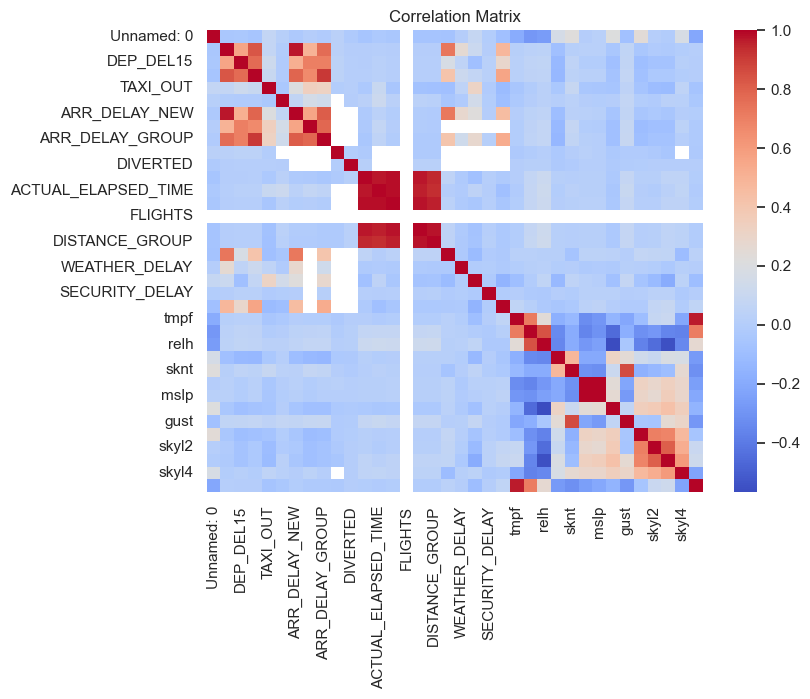

Highly Correlated Feature Pairs:
('DEP_DELAY_NEW', 'DEP_DELAY_GROUP')
('DEP_DELAY_NEW', 'ARR_DELAY_NEW')
('DEP_DELAY_NEW', 'ARR_DELAY_GROUP')
('DEP_DELAY_NEW', 'CARRIER_DELAY')
('DEP_DEL15', 'DEP_DELAY_GROUP')
('DEP_DEL15', 'ARR_DEL15')
('DEP_DELAY_GROUP', 'ARR_DELAY_NEW')
('DEP_DELAY_GROUP', 'ARR_DELAY_GROUP')
('ARR_DELAY_NEW', 'ARR_DELAY_GROUP')
('ARR_DELAY_NEW', 'CARRIER_DELAY')
('ARR_DEL15', 'ARR_DELAY_GROUP')
('CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME')
('CRS_ELAPSED_TIME', 'AIR_TIME')
('CRS_ELAPSED_TIME', 'DISTANCE')
('CRS_ELAPSED_TIME', 'DISTANCE_GROUP')
('ACTUAL_ELAPSED_TIME', 'AIR_TIME')
('ACTUAL_ELAPSED_TIME', 'DISTANCE')
('ACTUAL_ELAPSED_TIME', 'DISTANCE_GROUP')
('AIR_TIME', 'DISTANCE')
('AIR_TIME', 'DISTANCE_GROUP')
('DISTANCE', 'DISTANCE_GROUP')
('tmpf', 'dwpf')
('tmpf', 'feel')
('dwpf', 'relh')
('dwpf', 'feel')
('sknt', 'gust')
('alti', 'mslp')
('skyl1', 'skyl2')
('skyl2', 'skyl3')


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_columns]


correlation_matrix = numeric_data.corr()

# Create a heatmap using seaborn
sns.set(style="white")  # Set the style of the visualization
plt.figure(figsize=(8, 6))  # Set the size of the figure

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

highly_correlated = np.where(np.abs(correlation_matrix) > 0.7)

# Extract the feature pairs with high correlation
correlated_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                    for i, j in zip(*highly_correlated) if i != j and i < j]

# Print the list of highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
for pair in correlated_pairs:
    print(pair)


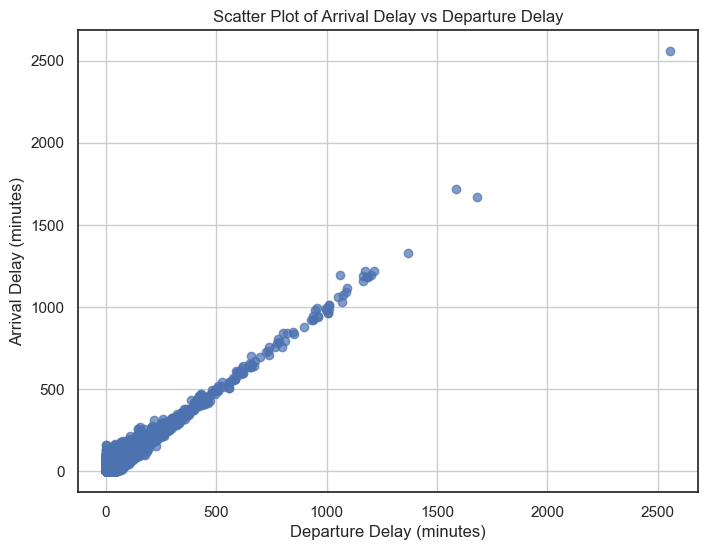

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['DEP_DELAY_NEW'], df['ARR_DELAY_NEW'], alpha=0.7)
plt.title('Scatter Plot of Arrival Delay vs Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

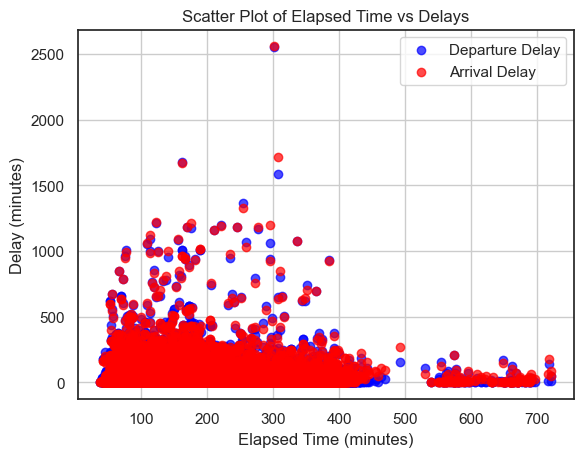

In [24]:
scatter = plt.scatter(df['ACTUAL_ELAPSED_TIME'], df['DEP_DELAY_NEW'], c='blue', label='Departure Delay', alpha=0.7)
plt.scatter(df['ACTUAL_ELAPSED_TIME'], df['ARR_DELAY_NEW'], c='red', label='Arrival Delay', alpha=0.7)
plt.legend()
plt.title('Scatter Plot of Elapsed Time vs Delays')
plt.xlabel('Elapsed Time (minutes)')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.show()

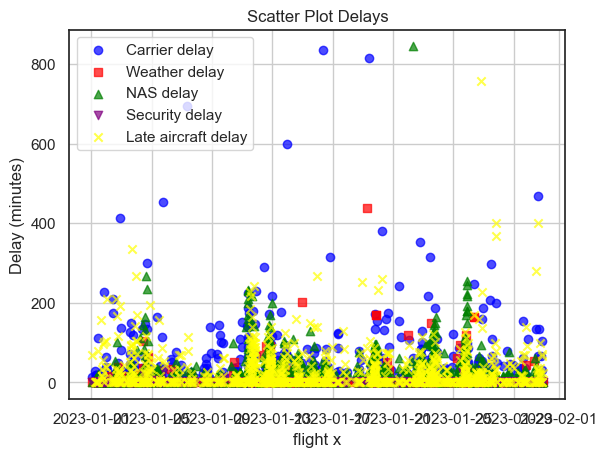

In [25]:
subset_size = 5000
df_subset = df.sample(n=subset_size, random_state=1784167)

scatter_carrier = plt.scatter(df_subset['valid_date_time_H'], df_subset['CARRIER_DELAY'], c='blue', label='Carrier delay', alpha=0.7, marker='o')
scatter_weather = plt.scatter(df_subset['valid_date_time_H'], df_subset['WEATHER_DELAY'], c='red', label='Weather delay', alpha=0.7, marker='s')
scatter_nas = plt.scatter(df_subset['valid_date_time_H'], df_subset['NAS_DELAY'], c='green', label='NAS delay', alpha=0.7, marker='^')
scatter_sec = plt.scatter(df_subset['valid_date_time_H'], df_subset['SECURITY_DELAY'], c='purple', label='Security delay', alpha=0.7, marker='v')
scatter_lateac = plt.scatter(df_subset['valid_date_time_H'], df_subset['LATE_AIRCRAFT_DELAY'], c='yellow', label='Late aircraft delay', alpha=0.7, marker='x')

plt.legend()
plt.title('Scatter Plot Delays')
plt.xlabel('flight x')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.show()

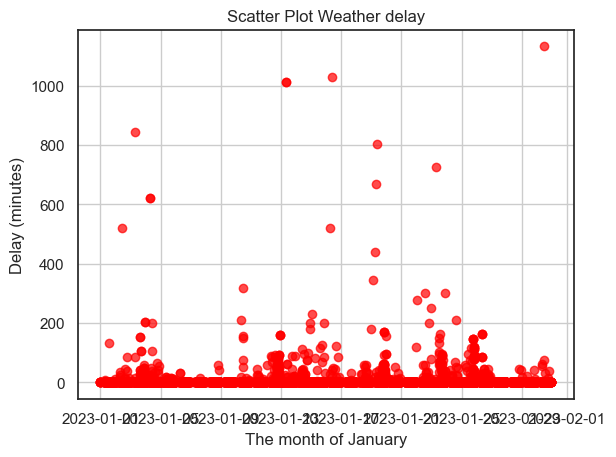

In [26]:
scatter_weather = plt.scatter(df['valid_date_time_H'], df['WEATHER_DELAY'], c='red', label='Weather delay', alpha=0.7, marker='o')
plt.title('Scatter Plot Weather delay')
plt.xlabel('The month of January')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.show()

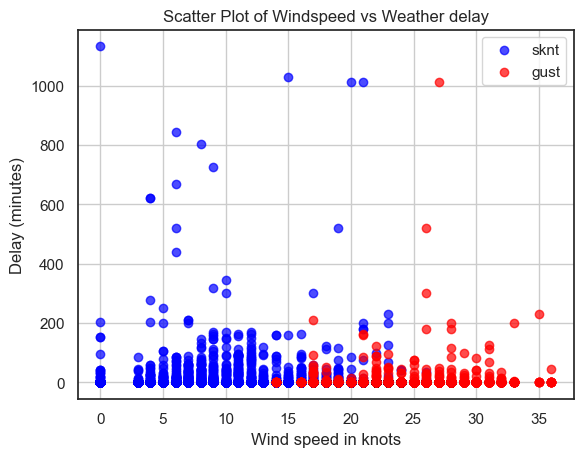

In [27]:
scatter = plt.scatter(df['sknt'], df['WEATHER_DELAY'], c='blue', label='sknt', alpha=0.7)
plt.scatter(df['gust'], df['WEATHER_DELAY'], c='red', label='gust', alpha=0.7)
plt.legend()
plt.title('Scatter Plot of Windspeed vs Weather delay')
plt.xlabel('Wind speed in knots')
plt.ylabel('Delay (minutes)')
plt.grid(True)
plt.show()

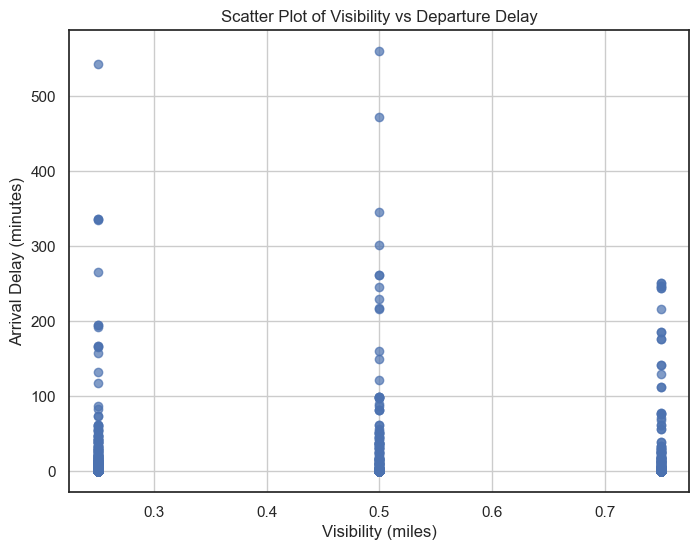

In [28]:
#zoom in na malou viditelnost 
df_subset1 = df[df['vsby'] < 1]

plt.figure(figsize=(8, 6))
plt.scatter(df_subset1['vsby'], df_subset1['ARR_DELAY_NEW'], alpha=0.7)
plt.title('Scatter Plot of Visibility vs Departure Delay')
plt.xlabel('Visibility (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

# Vytvořit kategoriální atributy 
bez nich to asi nepůjde a máme jich málo
tady bude debilni tovarna na label encoding juchuuuuuuuu

In [29]:
def label_encode(df, columns):
    # Create labels for our categories
    labels = ['Very low', 'Low', 'Average', 'High', 'Very high']

    for column in columns:
        # Assign each value to a category based on quantiles
        df[column + '_category'] = pd.qcut(df[column], q=5, labels=labels)

    return df

# Usage:
# df = label_encode(df, ['column1', 'column2', 'column3'])

df = label_encode(df, ['tmpf', 'relh','dwpf'])

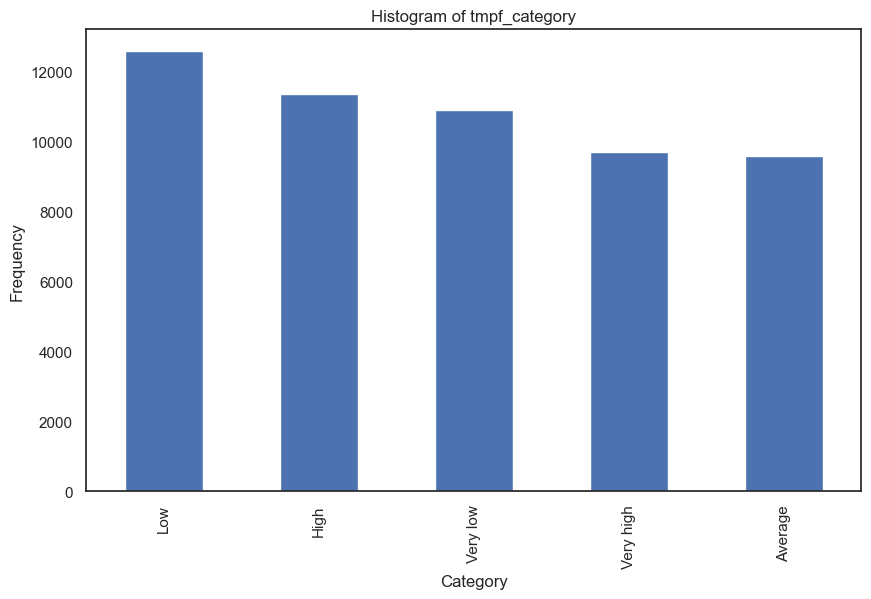

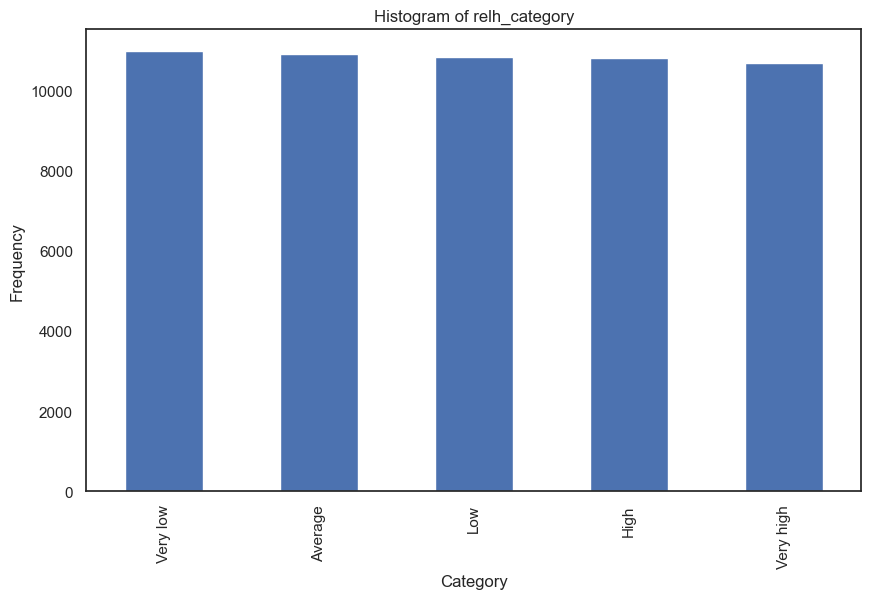

In [30]:
def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Histogram of {column}')
        plt.xlabel('Category')
        plt.ylabel('Frequency')
        plt.show()

# Usage:
plot_histograms(df, ['tmpf_category', 'relh_category',])

### kategorializace směru větru

In [31]:
def categorize_wind_direction(df, column):
    # Define the boundaries of our 4 categories
    boundaries = [0, 90, 180, 270, 360]

    # Create labels for our categories
    labels = ['North-East', 'South-East', 'South-West', 'North-West']

    # Assign each value to a category
    df[column + '_category'] = pd.cut(df[column], bins=boundaries, labels=labels, include_lowest=True)

    return df

df = categorize_wind_direction(df, 'drct')

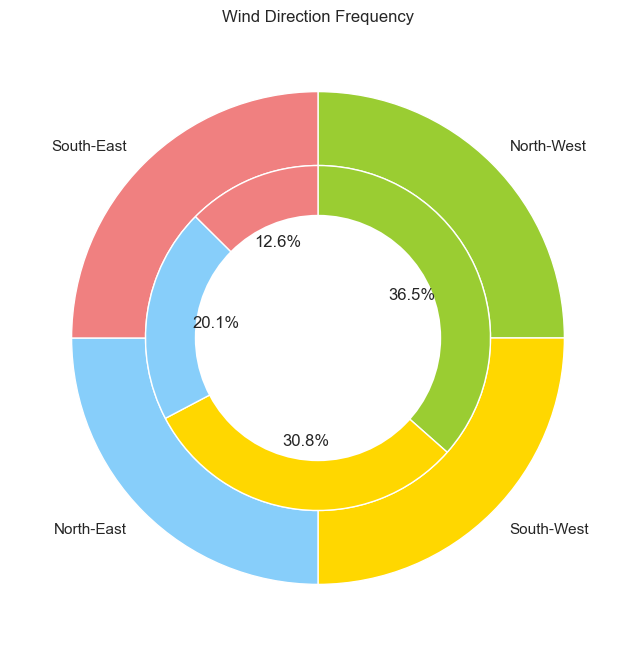

In [32]:
import matplotlib.pyplot as plt

def plot_wind_direction(df, column):
    frequencies = df[column].value_counts()
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    plt.figure(figsize=(8, 8))
    plt.pie([1, 1, 1, 1], labels=frequencies.index, colors=colors, 
            startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
    plt.pie(frequencies, labels=None, radius=0.7, colors=colors, 
            startangle=90, counterclock=False, autopct='%1.1f%%')
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('Wind Direction Frequency')
    plt.show()

plot_wind_direction(df, 'drct_category')


### kategorizace wind speed in knots (sknt), + 2 kategorie extreme low a extreme high lowest a highest decile 

In [33]:
def label_encode(df, columns):
    # Create labels for our categories
    labels = ['Extreme Low', 'Very Low', 'Low', 'Average', 'High', 'Very High', 'Extreme High']

    for column in columns:
        # Assign each value to a category based on quantiles
        df[column + '_category'] = pd.qcut(df[column], q=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1], labels=labels)

    return df
df = label_encode(df, ['sknt'])

# kategorizace CARRIER_DELAY	WEATHER_DELAY	NAS_DELAY	SECURITY_DELAY

In [34]:
def categorize_delay(df, columns):
    # Define the boundaries of our categories
    boundaries = [0, 5, 15, 30, 60, 120, 180, np.inf]

    # Create labels for our categories
    labels = ['Low', 'Noticeable', 'Medium', 'Above Average', 'High', 'Very High', 'Extreme']

    # Assign each value to a category for each column
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(0, inplace=True)  # replace NaN values with 0
            df[column + '_category'] = pd.cut(df[column], bins=boundaries, labels=labels, include_lowest=True)
        else:
            print(f"Cannot categorize column '{column}' because it's not numeric.")

    return df

columns_to_categorize = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df = categorize_delay(df, columns_to_categorize)



In [43]:
df['time'] = df['valid_date_time_H'].dt.strftime('%H:%M')


In [36]:
df.head()

,Unnamed: 0,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,station,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,feel,valid_date_time_H,tmpf_category,relh_category,dwpf_category,drct_category,sknt_category,CARRIER_DELAY_category,WEATHER_DELAY_category,NAS_DELAY_category,SECURITY_DELAY_category,LATE_AIRCRAFT_DELAY_category,time
0,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,0.0,0.0,0.0,0.0,0.0,JFK,46.0,46.0,100.0,250.0,9.0,0.00,29.76,NaN,0.25,NaN,BKN,OVC,NaN,NaN,500.0,1000.0,NaN,NaN,FG,40.92,2023-01-01 07:00:00,High,Very high,Very high,South-West,Average,Low,Low,Low,Low,Low,07:00
1,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,0.0,0.0,0.0,0.0,0.0,JFK,46.0,46.0,100.0,250.0,9.0,0.00,29.77,NaN,0.75,NaN,VV,NaN,NaN,NaN,700.0,NaN,NaN,NaN,BR,40.92,2023-01-01 07:00:00,High,Very high,Very high,South-West,Average,Low,Low,Low,Low,Low,07:00
2,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,0.0,0.0,0.0,0.0,0.0,JFK,46.0,46.0,100.0,250.0,8.0,0.00,29.77,NaN,1.00,NaN,VV,NaN,NaN,NaN,800.0,NaN,NaN,NaN,BR,41.36,2023-01-01 07:00:00,High,Very high,Very high,South-West,Low,Low,Low,Low,Low,Low,07:00
3,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,0.0,0.0,0.0,0.0,0.0,JFK,47.0,47.0,100.0,260.0,8.0,0.00,29.77,NaN,2.00,NaN,BKN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,BR,42.47,2023-01-01 07:00:00,High,Very high,Very high,South-West,Low,Low,Low,Low,Low,Low,07:00
4,0,AA,JFK,LAX,0.0,0.0,-1.0,17.0,12.0,2.0,0.0,0.0,0.0,0.0,382.0,388.0,359.0,1.0,2475.0,10,0.0,0.0,0.0,0.0,0.0,JFK,49.0,49.0,100.0,260.0,11.0,0.00,29.78,1008.3,6.00,NaN,FEW,BKN,BKN,NaN,800.0,8000.0,25000.0,NaN,BR,43.82,2023-01-01 07:00:00,Very high,Very high,Very high,South-West,High,Low,Low,Low,Low,Low,07:00


# Řešení analytických otázek

# CFMiner 
## dvě různé analytické otázky

In [37]:
from cleverminer import cleverminer as cm

Automatically reordering numeric categories ...done
Cleverminer version  1.0.8


In [82]:
clm = cm(df=df,target='time',proc='CFMiner',
               quantifiers= {'RelBase':0.001},
               cond ={
                    'attributes':[
                        {'name': 'CANCELLED', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                    ], 'minlen':1, 'maxlen':2, 'type':'con'}
               )

clm.print_summary()
clm.print_rulelist()
clm.print_rule(2)

Cleverminer version 1.0.8.
Starting data preparation ...
Automatically reordering numeric categories ...
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  CFMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 2, rules 2, times: prep 1.36sec, processing 0.01sec

CleverMiner task processing summary:

Task type : CFMiner
Number of verifications : 2
Number of rules : 2
Total time needed : 00h 00m 01s
Time of data preparation : 00h 00m 01s
Time of rule mining : 00h 00m 00s


List of rules:
RULEID BASE  S_UP  S_DOWN Condition
     1 54102     4     6 CANCELLED(0)
     2    74     3     2 CANCELLED(1)



Rule id : 2

Base :    74  Relative base : 0.001  Steps UP (consecutive) :     3  Steps DOWN (consecutive) :     2  Steps UP (any) :    11  Steps DOWN (any) :     7  H

In [ ]:
clm = cm(df=df,target='DEP_DELAY_GROUP',proc='CFMiner',
               quantifiers= {'RelBase':0.05},
               cond ={
                    'attributes':[
                        {'name': 'sknt_category', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'drct_category', 'type': 'subset', 'minlen': 1, 'maxlen': 1}   
                    ], 'minlen':2, 'maxlen':2, 'type':'con'}
               )

clm.print_summary()
clm.print_rulelist()
clm.print_rule(6)

# 4ftMiner
### dvě různé analytické otázky

In [92]:
clm = cm(df=df,proc='4ftMiner',
               quantifiers= {'conf':0.5, 'RelBase':0.001},
               ante ={
                    'attributes':[
                        {'name': 'sknt_category', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'WEATHER_DELAY_category', 'type': 'rcut', 'minlen': 1, 'maxlen': 4}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               cond ={
                    'attributes':[
                        {'name': 'time', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'drct_category', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'}
               )


clm.print_summary()
clm.print_rulelist()

Cleverminer version 1.0.8.
Starting data preparation ...
Automatically reordering numeric categories ...
Encoding columns into bit-form...
Encoding columns into bit-form...done
Data preparation finished.
Will go for  4ftMiner
Starting to mine rules.
  0%|                                                    |Elapsed Time: 0:00:00
 17%|#########                                           |Elapsed Time: 0:00:00
 24%|############                                        |Elapsed Time: 0:00:00
 33%|#################                                   |Elapsed Time: 0:00:00
 41%|#####################                               |Elapsed Time: 0:00:00
 91%|###############################################     |Elapsed Time: 0:00:00
100%|####################################################|Elapsed Time: 0:00:00
Done. Total verifications : 0, rules 0, times: prep 1.23sec, processing 0.29sec

CleverMiner task processing summary:

Task type : 4ftMiner
Number of verifications : 0
Number of rules : 0
To

clm = cm(df=df,proc='4ftMiner',
               quantifiers= {'conf':0.6, 'Base':50},
               ante ={
                    'attributes':[
                        {'name': 'GState', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'VTypeOfVisit', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               cond ={
                    'attributes':[
                        {'name': 'GCity', 'type': 'subset', 'minlen': 1, 'maxlen': 1},
                        {'name': 'GSex', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
                    ], 'minlen':1, 'maxlen':2, 'type':'con'}
               )


clm.print_summary()

# SD4ftMiner
### dvě různé analytické otázky

clm = cleverminer(df=df,proc='SD4ftMiner',
               quantifiers= {'Base1':20, 'Base2':20, 'Ratioconf' : 2.0},
               ante ={
                    'attributes':[
                        {'name': 'WSky', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'VTypeOfVisit', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               frst ={
                    'attributes':[
                        {'name': 'GState', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               scnd ={
                    'attributes':[
                        {'name': 'GState', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'}
               )


clm.print_summary()
clm.print_rulelist()
clm.print_rule(1)

clm = cleverminer(df=df,proc='SD4ftMiner',
               quantifiers= {'Base1':20, 'Base2':20, 'Ratioconf' : 2.0},
               ante ={
                    'attributes':[
                        {'name': 'WSky', 'type': 'subset', 'minlen': 1, 'maxlen': 2}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               succ ={
                    'attributes':[
                        {'name': 'VTypeOfVisit', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               frst ={
                    'attributes':[
                        {'name': 'GState', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'},
               scnd ={
                    'attributes':[
                        {'name': 'GState', 'type': 'subset', 'minlen': 1, 'maxlen': 1}
                    ], 'minlen':1, 'maxlen':1, 'type':'con'}
               )


clm.print_summary()
clm.print_rulelist()
clm.print_rule(1)

# Další 4 dle vaší volby 
### (např. predikce pokud jste absolvovali 4IZ450, jiná interpretovatelná metoda, postprocessing dat, vizualizační balíček)


## Decision tree explainable classifier

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
print(df.columns)

Index(['Unnamed: 0', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'station', 'tmpf',
       'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust',
       'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'wxcodes', 'feel', 'valid_date_time_H', 'tmpf_category',
       'relh_category', 'dwpf_category', 'drct_category', 'sknt_category',
       'CARRIER_DELAY_category', 'WEATHER_DELAY_category',
       'NAS_DELAY_category', 'SECURITY_DELAY_category',
       'LATE_AIRCRAFT_DELAY_category', 'time'],
      dtype='object')


In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

NameError: name 'features' is not defined

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Low'

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, 
               feature_names = features.columns, 
               class_names=['class1','class2'],  # replace with your class names
               filled = True)
plt.show()
